<a href="https://colab.research.google.com/github/Kaiziferr/-Miner_Detector/blob/master/Sequential/8_workshop_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv'
data = pd.read_csv(url)
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [3]:
data_values = data.values
X = data_values[:,0:8]
y = data_values[:,8]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [5]:
#Create model
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [6]:
#ajuste
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10, verbose=0)

In [7]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


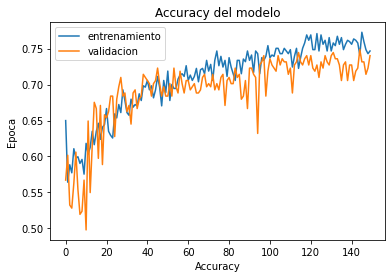

In [8]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del modelo')
plt.xlabel('Accuracy')
plt.ylabel('Epoca')
plt.legend(['entrenamiento', 'validacion'], loc='upper left')

* El modelo tiende a seguir aumentando durante las ultimas epocas
* El modelo tiende a overfitting, ya que muestra una habilidad con los datos de entrenamiento mejor que la de validación en las ultimas epocas.





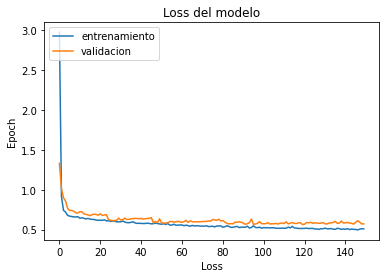

In [9]:
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss del modelo')
plt.ylabel('Epoch')
plt.xlabel('Loss')
plt.legend(['entrenamiento','validacion'], loc='upper left')

* La grafica de perdida se obtiene un rendimiento comparable entre el train y test
* No hay un desvio significativo, por lo tanto el modelo no tendria que ser entrenado con menos epocas